# Prepare Soilmap for Spruce Canyon

Ideas:
- download soil content data : clay, sand, silt (0-5cm mean), load spruce watershed DEM to determine raster width and height
- determine soil types: use soiltexture pkg

In [1]:
# load spruce DEM data
import rasterio

with rasterio.open("spruce_watershed.txt") as dataset:
    # Read the first band
    dem_data = dataset.read(1)

height, width = dem_data.shape

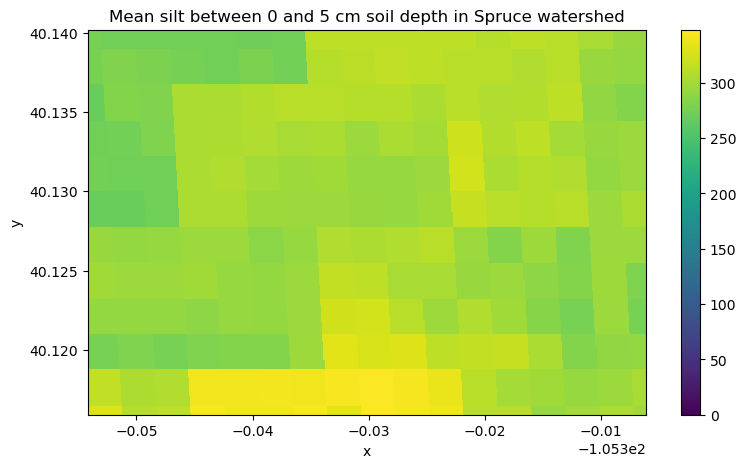

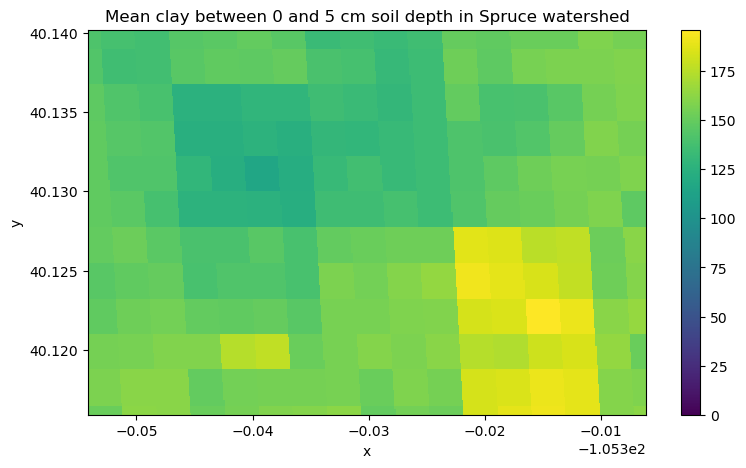

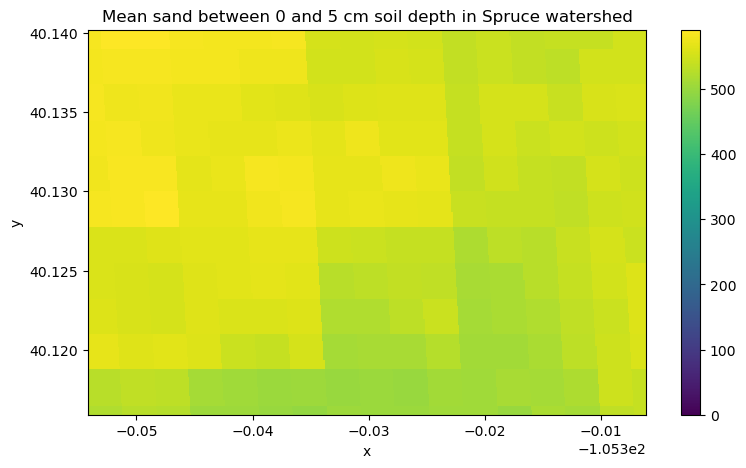

In [2]:
# download soil content data using soilgrids
from soilgrids import SoilGrids
import matplotlib.pyplot as plt

soil_grids = SoilGrids()
data_list = []

for content in ["silt", "clay", "sand"]:
    data = soil_grids.get_coverage_data(
        service_id=content,
        coverage_id=f"{content}_0-5cm_mean",
        south=40.1159259034844595,
        north=40.1401851627613553,
        east=-105.3061110570937871,
        west=-105.3541666126844376,
        width=width,
        height=height,
        crs="urn:ogc:def:crs:EPSG::4326",
        output=f"{content}.tif",
        local_file=True,
    )
    data_list.append(data)
    data.plot(figsize=(9, 5), vmin=0)
    plt.title(f"Mean {content} between 0 and 5 cm soil depth in Spruce watershed")

In [3]:
clay = data_list[1]
sand = data_list[2]
silt = data_list[0]

In [4]:
from soiltexture import getTextures
import numpy as np

texture_class = getTextures(
    (sand.data[0] / 10).flatten(), (silt.data[0] / 10).flatten(), classification="USDA"
)

In [5]:
np.unique(texture_class)

array(['sandy clay loam'], dtype='<U15')

In [6]:
np.unique((sand.data[0] / 10).flatten())

array([49.6, 49.9, 50. , 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.5,
       52.6, 52.7, 52.8, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8,
       53.9, 54. , 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9,
       55. , 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. ,
       56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57. , 57.1,
       57.2, 57.3, 57.5, 57.6, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4,
       58.6, 58.9, 59.1])

In [7]:
np.unique((silt.data[0] / 10).flatten())

array([26.9, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.9, 28.1, 28.2,
       28.3, 28.4, 28.5, 28.7, 28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5,
       29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6,
       30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7,
       31.8, 32.1, 32.3, 32.4, 32.7, 32.9, 33.2, 33.3, 33.7, 34. , 34.1,
       34.2, 34.3, 34.4, 34.5, 34.6, 34.8])